# Data Distribution   
Dimentionnality reduction with TSNE and PCA to visualize data

Packages 

In [2]:
import os
#Change current directory
os.chdir ('/home/hamza_hajjini@MCC.DOMAIN/bcppmchurn')
#Check the current directory
os.getcwd()

'/home/hamza_hajjini@MCC.DOMAIN/bcppmchurn'

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 
import random
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 

from src.eda import utils
from src.eda.utils import columnsFamilies

In [4]:
#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
train_dev_test_path = "data/train_dev_test"
data_path = "data/experiments_data"
data_samples_path = "data/data_samples"
artifacts_path = "artifacts/eda"

In [5]:
#Reload modules in case a change has occured
#import importlib
#from src.components import data_ingestion, data_structuring
#importlib.reload(data_ingestion)
#importlib.reload(data_structuring)

### Loding data

--------------------

In [6]:
#Loading data
data_date = "2024-10-17"
x_train = pd.read_csv(f"{data_path}/{data_date}_x_train.csv", index_col = 0)
x_dev = pd.read_csv(f"{data_path}/{data_date}_x_dev.csv", index_col = 0)
x_test = pd.read_csv(f"{data_path}/{data_date}_x_test.csv", index_col = 0)
y_train = pd.read_csv(f"{data_path}/{data_date}_y_train.csv", index_col = 0)
y_dev = pd.read_csv(f"{data_path}/{data_date}_y_dev.csv", index_col = 0)
y_test = pd.read_csv(f"{data_path}/{data_date}_y_test.csv", index_col = 0)

print (f"x_train shape : {x_train.shape}")
print (f"x_dev shape : {x_dev.shape}")
print (f"x_test shape : {x_test.shape}")
print (f"y_train shape : {y_train.shape}")
print (f"y_dev shape : {y_dev.shape}")
print (f"y_test shape : {y_test.shape}")

x_train shape : (86992, 531)
x_dev shape : (14563, 531)
x_test shape : (5839, 531)
y_train shape : (86992, 1)
y_dev shape : (14563, 1)
y_test shape : (5839, 1)


In [7]:
#target value_counts
print ("y_train")
print (y_train.value_counts())
print ("-------------")
print ("y_dev")
print (y_dev.value_counts())
print ("-------------")
print ("y_test")
print (y_test.value_counts())

y_train
churn
1        43700
0        43292
dtype: int64
-------------
y_dev
churn
1        7325
0        7238
dtype: int64
-------------
y_test
churn
1        2938
0        2901
dtype: int64


-------------------

### Apply T-SNE for visualization

**df_train**

In [54]:
#Apply tsne
x_train_tsne_10 = TSNE(n_components = 2, perplexity = 10).fit_transform(x_train)
x_train_tsne_30 = TSNE(n_components = 2, perplexity = 30).fit_transform(x_train)

In [55]:
x_train_tsne_50 = TSNE(n_components = 2, perplexity = 50).fit_transform(x_train)
x_train_tsne_90 = TSNE(n_components = 2, perplexity = 90).fit_transform(x_train)

In [56]:
#tsne result to a dataframe
train_tsne_10 = pd.DataFrame(x_train_tsne_10, columns = ["x1", "x2"])
train_tsne_30 = pd.DataFrame(x_train_tsne_30, columns = ["x1", "x2"])
train_tsne_50 = pd.DataFrame(x_train_tsne_50, columns = ["x1", "x2"])
train_tsne_90 = pd.DataFrame(x_train_tsne_90, columns = ["x1", "x2"])
#Add target column
train_tsne_10["churn"] = y_train["churn"]
train_tsne_30["churn"] = y_train["churn"]
train_tsne_50["churn"] = y_train["churn"]
train_tsne_90["churn"] = y_train["churn"]
train_tsne.head()

x1         x2  churn
0   3.742635   0.709788      0
1  17.612688  39.186848      0
2  34.908520  -5.158603      0
3 -12.315415 -21.724119      1
4   8.975062  11.239729      0

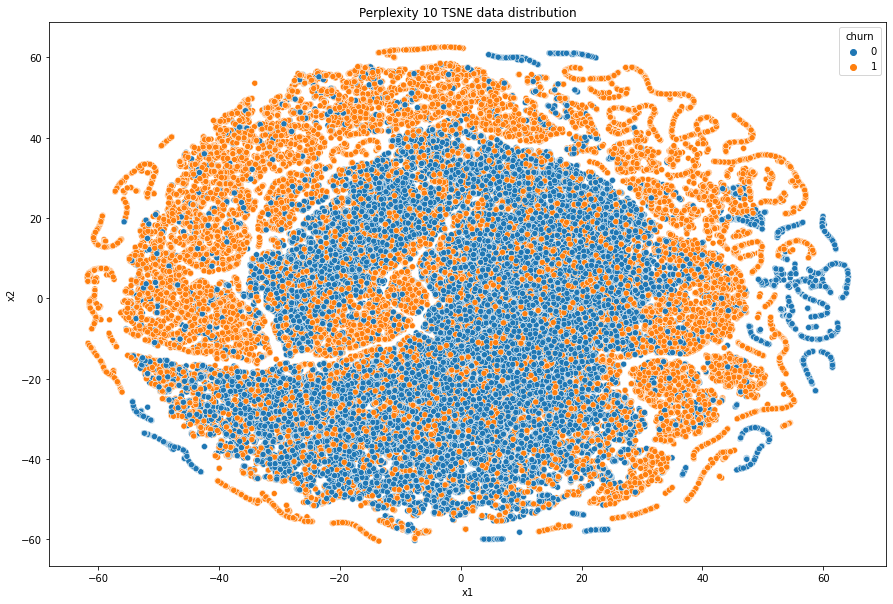

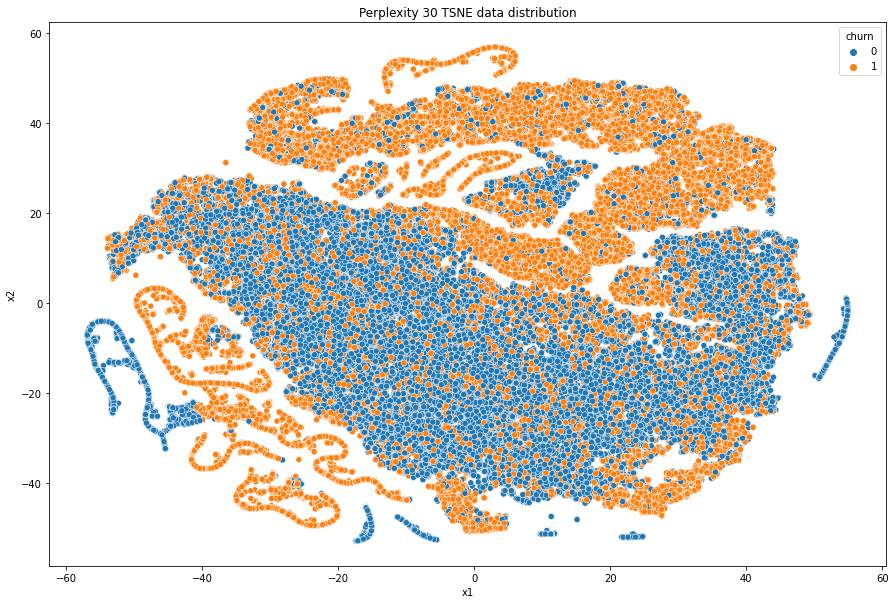

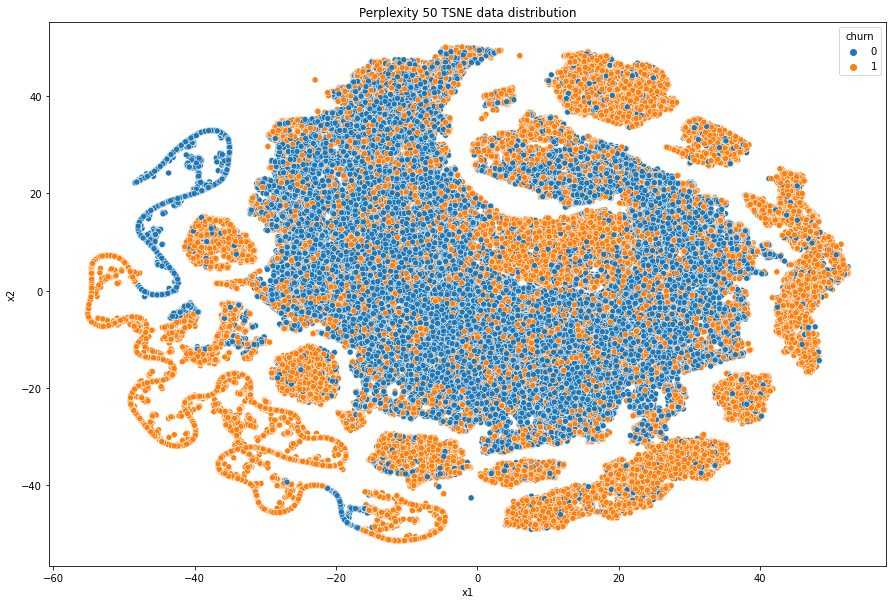

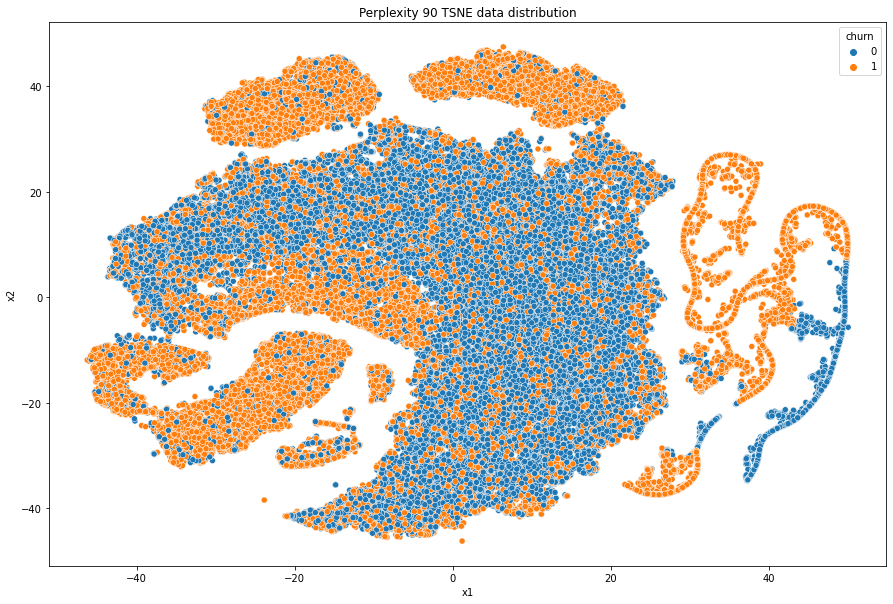

In [60]:
dict_of_tsne = {"10": train_tsne_10, "30" : train_tsne_30, "50": train_tsne_50, "90": train_tsne_90}
for key, value in dict_of_tsne.items():
    plt.figure(figsize=(15, 10))
    sns.scatterplot(data = value, x="x1", y="x2", hue = "churn")
    plt.title(f"Perplexity {key} TSNE data distribution")
    plt.show()

Applying tsne on data
Ploting data distribution


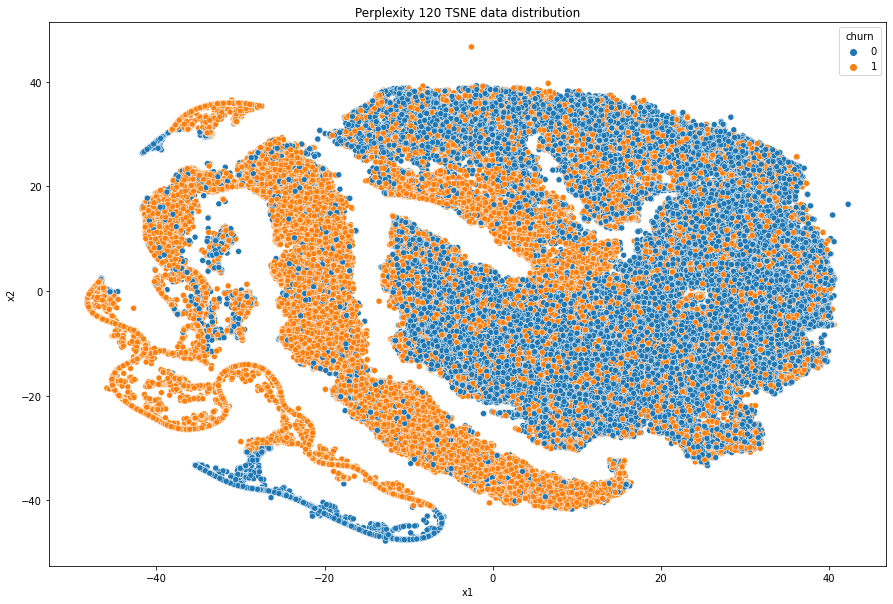

Applying tsne on data
Ploting data distribution


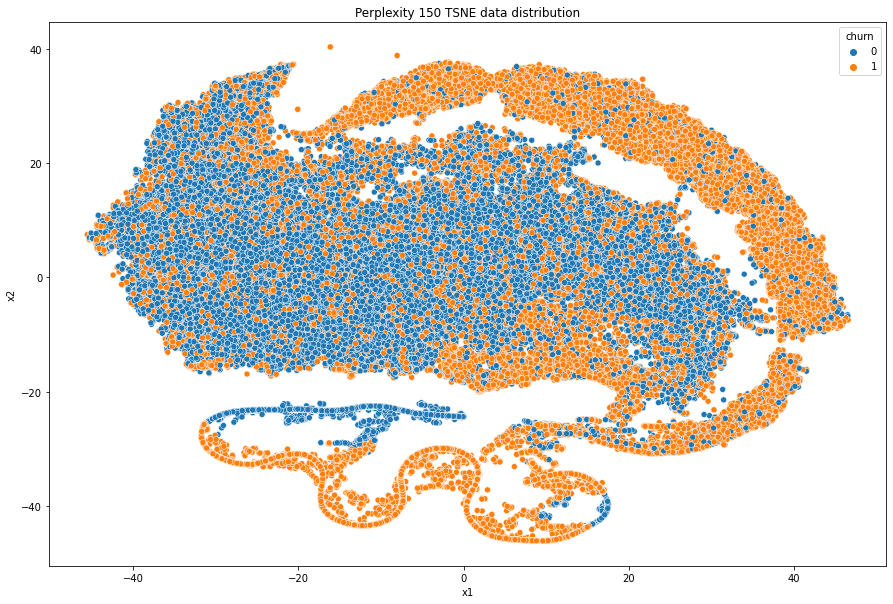

In [17]:
list_of_perplexities = [120, 150]
for perp in list_of_perplexities:
    vis_tsne_data_distribution(x_train, y_train["churn"], perplexity = perp)

### PCA

In [57]:
pca_variance = {"n_components": [], "components_variance": [] }
for n_components in range(1,21):
    pca = PCA(n_components = n_components)
    pca.fit(x_train)
    components_variance = pca.explained_variance_ratio_.sum()
    pca_variance["n_components"].append(n_components)
    pca_variance["components_variance"].append(components_variance)
pca_variance = pd.DataFrame(pca_variance)

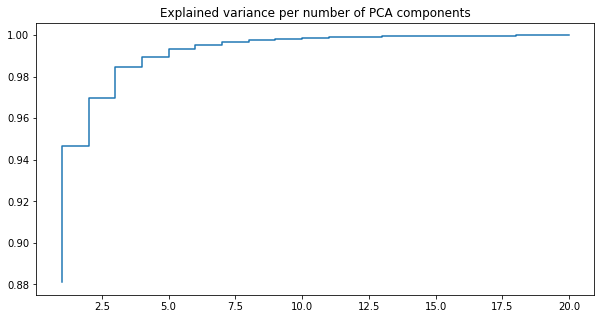

In [93]:
plt.figure(figsize = (10, 5))
plt.step(data = pca_variance, x="n_components", y="components_variance")
plt.title ("Explained variance per number of PCA components")
plt.show()

#### PCA for vis

In [83]:
#PCA fit transform data
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)

In [85]:
#TO DATAFRAME
x_train_pca = pd.DataFrame(x_train_pca, columns=["x1", "x2"])
x_train_pca["churn"] = y_train["churn"]
x_train_pca.head()

x1            x2  churn
0 -1.645649e+09  1.345630e+10      0
1  8.492952e+10  2.356994e+09      0
2  7.473182e+09 -1.783368e+10      0
3 -4.022543e+10  4.400278e+09      1
4  1.698494e+10  4.440178e+09      0

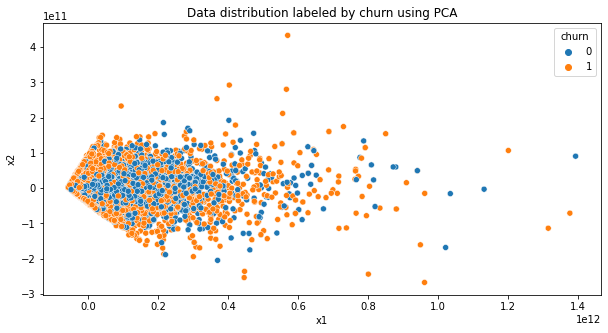

In [90]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = x_train_pca, x =  "x1", y="x2", hue="churn")
plt.title("Data distribution labeled by churn using PCA")
plt.show()